# DSCI 521: Data Analysis and Interpretation <br>  Term Project Phase 2: Project Implementation 

#  <font color='red'> **Analyzing Customer reviews using text mining to predict their behaviour**

### Module submission group
- Group member 1
    - Name: Hemachandar Nagarajan
    - Email: hn395@drexel.edu
- Group member 2
    - Name: Sahibzada Aasim Imtiyaz
    - Email: si339@drexel.edu
- Group member 3
    - Name: Ishita Kakar
    - Email: ik372@drexel.edu
- Group member 4
    - Name: Shailey Rai
    - Email: sr3466@drexel.edu

# Table of Contents
1. [Libraries Used](#Libraries)
2. [Data Import](#Import)
3. [Understanding the Data](#Info)
4. [Data Exploration](#Exploration)
5. [Bivariate Analysis](#Bivariate)
6. [Data Preprocessing](#Preprocessing)
     1. [Missing Values](#Missing_values)
     2. [Outlier Detection](#Outliers)
     3. [Removing Redundant Features](#Redundancy)
     4. [Text Preprocessing](#Text_preprocessing)
     5. [Encoding Categorical Variables](#Dummy_variables)
     6. [Balancing Dataset](#Balancing)
7. [Classification Models](#Models)
8. [Performance Comparison & Model Selection](#Selection)

Data Source : https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews/home

## Libraries Used <a name="Libraries"></a>

In [154]:
import pandas as pd
import numpy as np
from scipy import stats
import re
import string

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#from wordcloud import WordCloud


from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer 
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import spacy
import re
from wordcloud import WordCloud
from textblob import TextBlob
from imblearn.over_sampling import SMOTE
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

import warnings
warnings.filterwarnings('ignore') 

from IPython.display import Image

%matplotlib inline

## Data Import  <a name="Import"></a>

In [2]:
data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv", index_col = 0)

In [3]:
data.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


## Understanding the Data <a name="Info"></a>

We have a review dataset of 23486 rows and 10 columns of data. The feature variables are:  
* **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed. 
* **Age**: Positive Integer variable of the reviewers age.
* **Title**: String variable for the title of the review.
* **Review Text**: String variable for the review body.
* **Rating**: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
* **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
* **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
* **Division Name**: Categorical name of the product high level division.
* **Department Name**: Categorical name of the product department name.
* **Class Name**: Categorical name of the product class name.

In [4]:
list(data.columns)

['Clothing ID',
 'Age',
 'Title',
 'Review Text',
 'Rating',
 'Recommended IND',
 'Positive Feedback Count',
 'Division Name',
 'Department Name',
 'Class Name']

In [6]:
data.describe()
#Summary Statitics of the numerical columns

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


## **Exploratory Data Analysis** <a name="Exploration"></a>

### `Age` Column

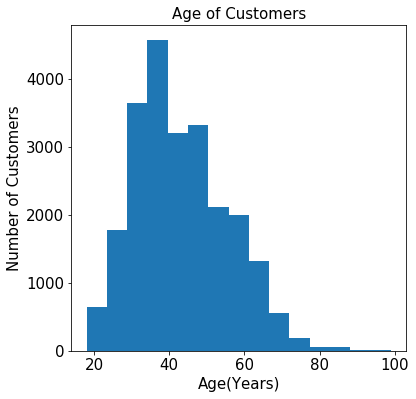

In [8]:
## set the figure dimensions
hist_fig = plt.figure(figsize = (6, 6))
    
## make a histogram and set the number of bins to 15
_  = plt.hist(data["Age"], bins = 15)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Age of Customers", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Number of Customers", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Age(Years)", fontsize = 15)

<font color =red> **From the distribution of Age you can see that age ranges from 20 to 100. But looking at some of the reviews above 80 don't seem to match the age associated with the review. So the distribution shown likely is not the correct shape. However, the majority of the reviews seem to come from ages 18 to 40, which is expected.**

### `Positive Feedback Count` Column

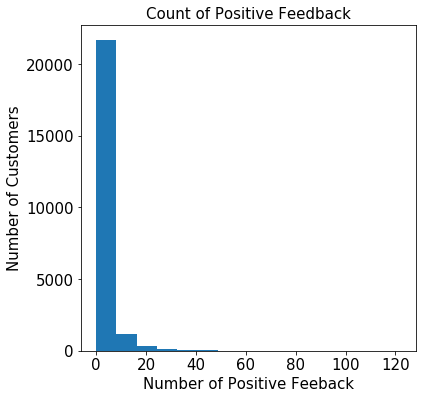

In [10]:
## set the figure dimensions
hist_fig = plt.figure(figsize = (6, 6))
    
## make a histogram and set the number of bins to 15
_  = plt.hist(data["Positive Feedback Count"], bins = 15)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Count of Positive Feedback", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Number of Customers", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Number of Positive Feeback", fontsize = 15)

<font color = red> **The plot shows that there is very less positive feedback count by most of the customers i.e < 20**

### `Rating` Column

Text(0, 0.5, 'Count')

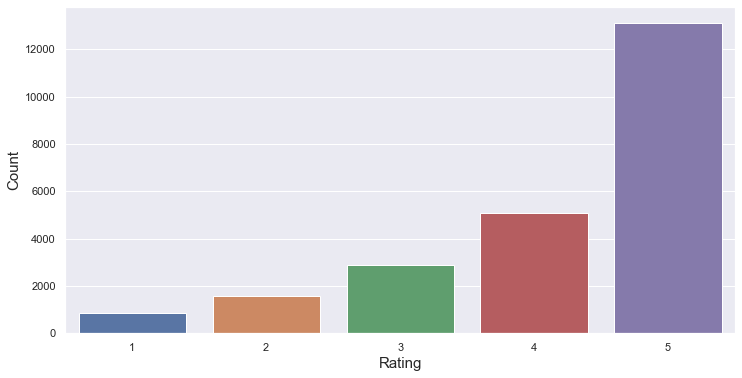

In [16]:
sns.countplot(x='Rating', data = data)
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel("Rating", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

<font color = red> **From the count plot you can see that more customers are giving 3,4 and 5 rating for the retailer products.**

### `Recommended IND` Column

In [17]:
data["Recommended IND"].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

Text(0, 0.5, 'Count')

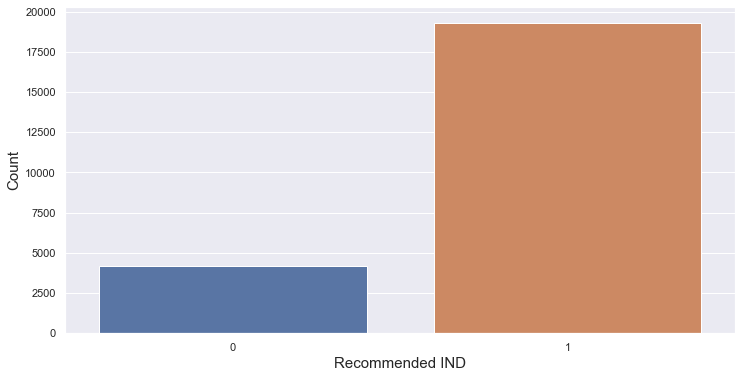

In [18]:
sns.countplot(data["Recommended IND"])
plt.xlabel("Recommended IND", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

<font color = red> **From the count plot you can see that more product were recommended by the customers, which is a good thing for the retailer.**

### `Division Name` Column

([<matplotlib.patches.Wedge at 0x2726b55e3c8>,
 [Text(-1.056260591828854, -0.3071051320791616, 'General'),
  Text(1.0963117297119152, 0.09000328491821262, 'General Petite'),
  Text(0.21965091618832264, 1.0778466843747447, 'Initmates')],
 [Text(-0.5761421409975567, -0.1675118902249972, '59.0%'),
  Text(0.5979882162064991, 0.0490927008644796, '34.6%'),
  Text(0.11980959064817596, 0.5879163732953153, '6.4%')])

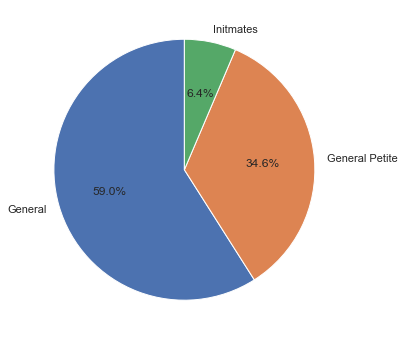

In [20]:
fig,axis = plt.subplots()
x = list(data['Division Name'].value_counts().index)
y = list(data['Division Name'].value_counts().values)
axis.pie(y,labels = x, autopct = '%1.1f%%', startangle = 90)

<font color = red> **From the pie chart you can see that most of the orders where from the General and General Petite divisions.**

### `Department Name` Column

Text(0, 0.5, 'Count')

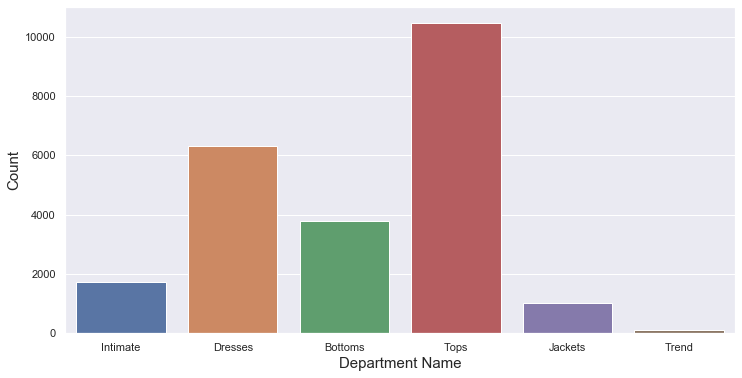

In [24]:
sns.countplot(x =data['Department Name'])
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel("Department Name", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

<font color = red> **The Tops and Dresses department had most of the reviews.** 

### `Class Name` Column

In [25]:
data["Class Name"].value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

Text(0, 0.5, 'Class Name')

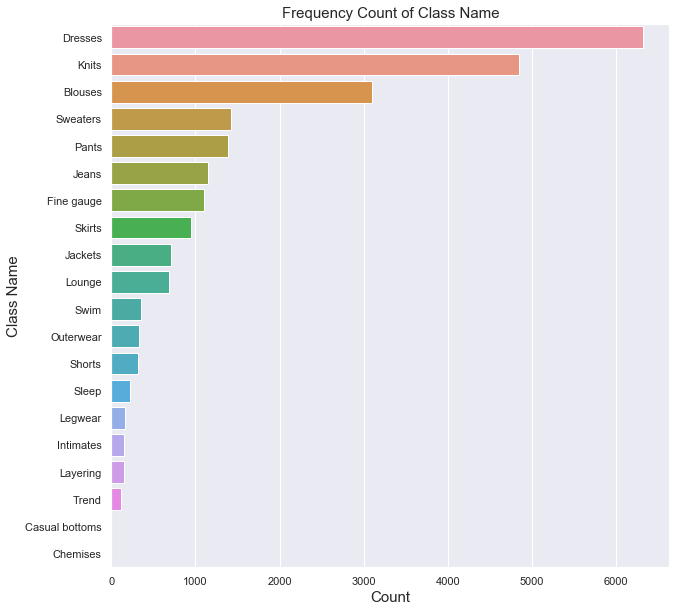

In [28]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(y="Class Name", data=data,order=data["Class Name"].value_counts().index)
plt.title("Frequency Count of Class Name", fontsize = 15)
plt.xlabel("Count", fontsize = 15)
plt.ylabel("Class Name", fontsize = 15)

## Bivariate Analysis <a name="Bivariate"></a>

Text(0, 0.5, 'Count')

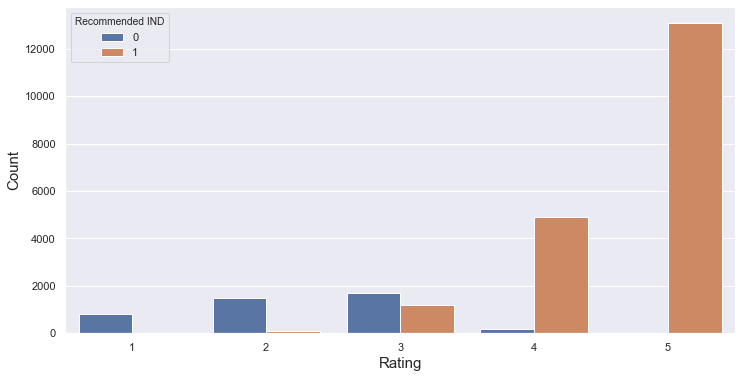

In [30]:
sns.countplot(x='Rating', hue='Recommended IND',data=data)
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel("Rating", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

<font color = red> **We can see that customers who gave the highest reviews have also recommended the product to other which is again the expected outcome.** 

Text(0, 0.5, 'Count')

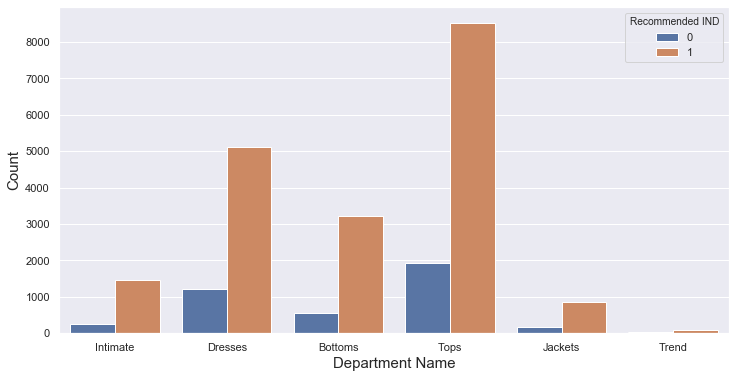

In [34]:
sns.countplot(x = 'Department Name', hue = 'Recommended IND', data = data)
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel("Department Name", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

<font color = red> **From the side by side bar plot we are able to understand which department performs well and gets  most recommendation from customers. Here Tops and Dresses department get the most items recommended.**

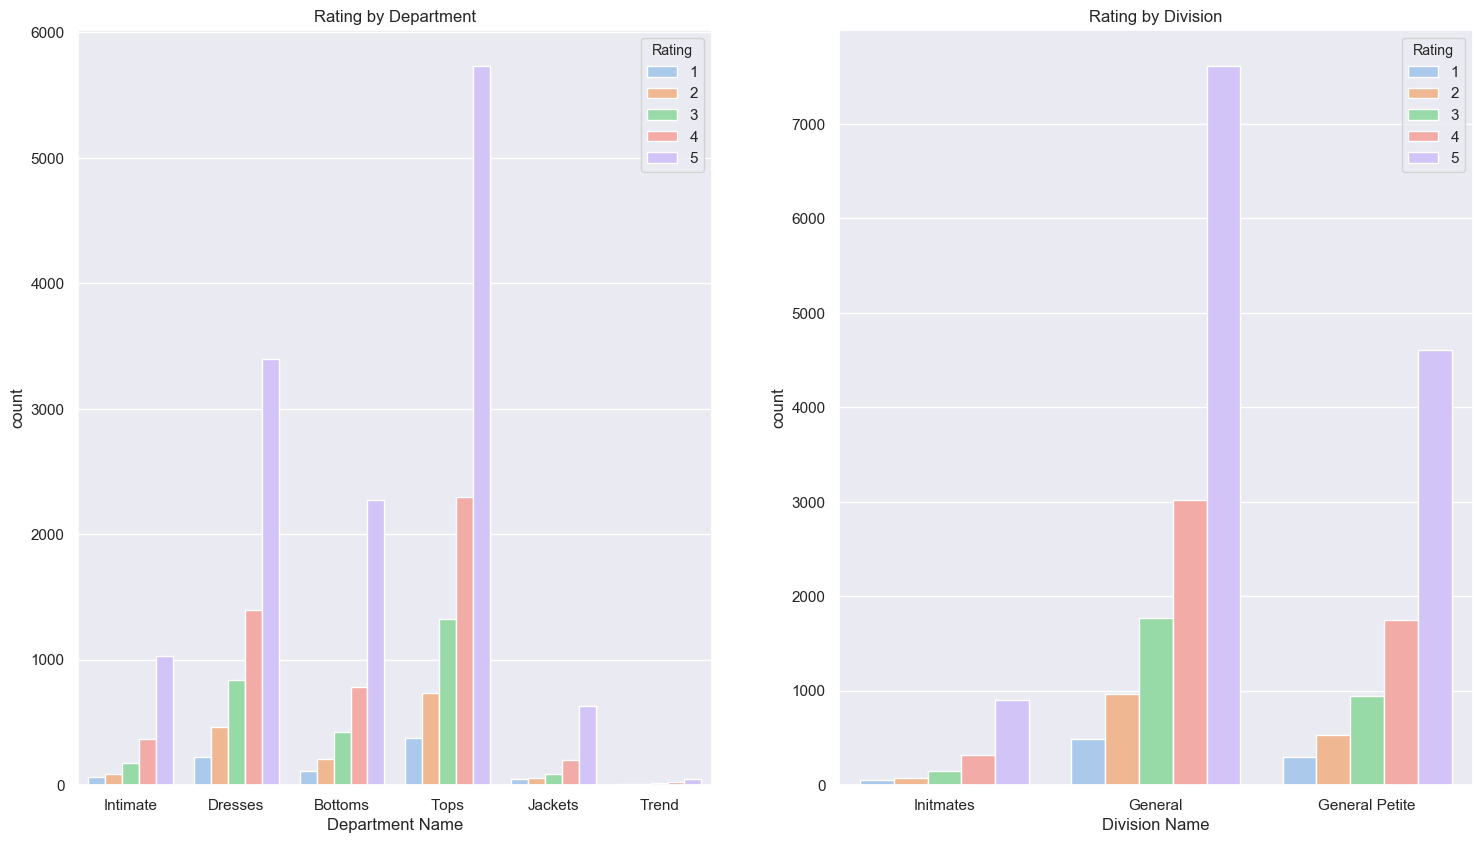

In [39]:
plt.figure(figsize=(18,10),dpi=100)
the_grid = gridspec.GridSpec(1, 2)

sns.set(font_scale=1) 
plt.subplot(the_grid[0],  title='Rating by Department')
sns.countplot(x=data["Department Name"],hue=data["Rating"],palette=sns.color_palette('pastel'))

plt.subplot(the_grid[1],  title='Rating by Division')
sns.countplot(x=data["Division Name"],hue=data["Rating"],palette=sns.color_palette('pastel'))

plt.show()

<font color = red> **The above plots show how much rating each department and division is getting. The Tops and Dresses Departments get most of the 5 star ratings. And in divisions General and General Petite get most of the 5 star ratings.**

## Data Preprocessing <a name="Preprocessing"></a>

### **Check for Missing Values** <a name="Missing_values"></a>

In [38]:
data.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

<font color = red> **As you can see there are 4697 missing values. Since these missing values are reviews and categorical data it is better to remove them for our analysis. They won't make an impact.**

In [40]:
data = data.dropna(axis=0)

In [41]:
data.isna().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

### Outlier Detection <a name="Outliers"></a>

Text(0.5, 0, 'Age')

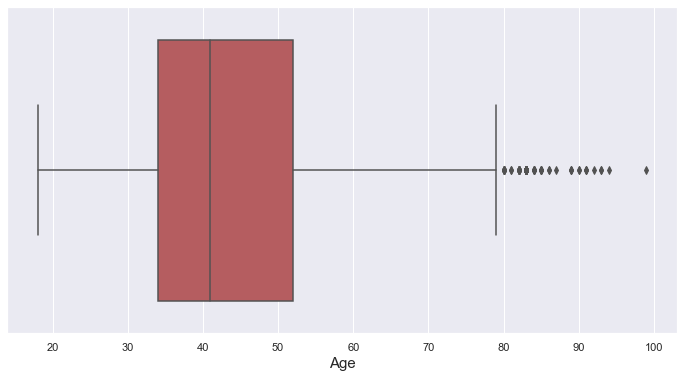

In [43]:
sns.boxplot(x= data['Age'], color ='r')
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel("Age", fontsize = 15)

<font color = red> **From the boxplot the median age is around 40 as shown from the `data.describe()` above. The are quite a number of extreme points above the whiskers past age 80 indicating these are the ouliers present in the `Age` feature.** 

Text(0.5, 0, 'Positive Feedback Count')

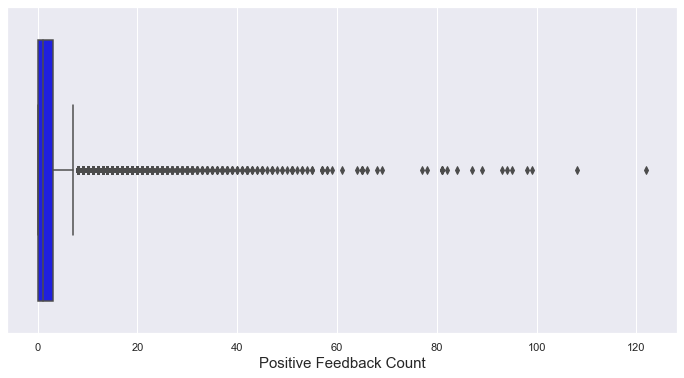

In [44]:
sns.boxplot(x= data['Positive Feedback Count'], color ='blue')
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel("Positive Feedback Count", fontsize = 15)

<font color = red> **From the boxplot the median Positive Feedback Count is around 1 as shown from the `data.describe()` above. The are quite a number of extreme points above the whiskers indicating these are the ouliers present in the `Positive Feeback Count`  feature.** 

In [23]:
#CREDITS: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba 

In [48]:
data.shape

(19662, 10)

In [51]:
data_new = data[(np.abs(stats.zscore(data["Age"])) < 3)& (np.abs(stats.zscore(data["Positive Feedback Count"])) < 3)]

In [52]:
data_new.shape

(19239, 10)

### Removing Redundant Features <a name="Redundancy"></a>

In [57]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = data_new.corr()
corr.style.background_gradient(cmap='coolwarm')

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
Clothing ID,1.000000,0.012203,-0.013416,-0.012410,0.029406
Age,0.012203,1.000000,0.031424,0.035100,0.055867
Rating,-0.013416,0.031424,1.000000,0.793128,-0.063855
Recommended IND,-0.012410,0.035100,0.793128,1.000000,-0.067688
Positive Feedback Count,0.029406,0.055867,-0.063855,-0.067688,1.000000


<font color = red> **From the above correlation table we can see that there are no redundant variables and the variable `Rating` is highly correlated with our target variable `Recommended IND`.** 

### Text Preprocessing <a name="Text_preprocessing"></a>

In [58]:
nlp = spacy.load("en_core_web_sm")

In [60]:
stop = set(stopwords.words('english'))
stop.add("i'm")
snb = SnowballStemmer('english')

def cleanpunc(sentence):
    sentence = re.sub("[?;!_#-]","",sentence)
    sentence = re.sub("[.,)(\/:<>]","",sentence)
    sentence = re.sub("[0-9]","",sentence)
    cleaned = re.sub("[\[\]]","",sentence)  
    return cleaned

In [61]:
data_new['Cleaned_Text'] = data_new['Review Text']
clean = []

for sent in data_new['Review Text']:
    sentence = cleanpunc(sent)
    wordtokens = sentence.split()
    updatelist=[]
    for w in wordtokens:
        if((w.lower() not in stop)&(len(w)>2)):
            updatelist.append(w.lower())
    sentence = " ".join(updatelist)
    sentence = re.sub("[']",'',sentence)
    sentence = re.sub('["]','',sentence)
    updatelist = []
    doc = nlp(sentence)
    updatelist.append(" ".join([token.lemma_ for token in doc]))
    sentence = "".join(updatelist)
    clean.append(sentence)

In [62]:
data_new['Cleaned_Text'] = clean

In [63]:
data_new.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Cleaned_Text
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hope dress really want work initially ord...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirty fabulous ev...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flattering due adjustable front tie perf...
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,love tracy reese dress one petite foot tall us...
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,ade basket hte last mintue see would look like...
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,ordered carbon store pick ton stuff always try...
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,love dress usually get run little snug bust or...
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,lbs order petite make sure length long typical...
10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses,dress run small esp zipper area run order typi...
12,1095,53,Perfect!!!,More and more i find myself reliant on the rev...,5,1,2,General Petite,Dresses,Dresses,find reliant review write savvy shopper past r...


#### Word Count of Cleaned Review

In [69]:
def wordcount(x):
    if(type(x)==type("String")):
        return len(x.split())
    elif(type(x)==type(1.0)):
        return 0

In [71]:
data_new['Word Count'] = data_new['Cleaned_Text'].map(lambda x: wordcount(x))

In [72]:
data_new.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Cleaned_Text,Word Count
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hope dress really want work initially ord...,46
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirty fabulous ev...,14
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flattering due adjustable front tie perf...,16
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,love tracy reese dress one petite foot tall us...,39
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,ade basket hte last mintue see would look like...,47
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,ordered carbon store pick ton stuff always try...,49
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,love dress usually get run little snug bust or...,16
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,lbs order petite make sure length long typical...,31
10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses,dress run small esp zipper area run order typi...,31
12,1095,53,Perfect!!!,More and more i find myself reliant on the rev...,5,1,2,General Petite,Dresses,Dresses,find reliant review write savvy shopper past r...,38


In [81]:
print("Total Number of Words in the Cleaned Reviews Column :" + str(sum(data_new['Word Count'])))

Total Number of Words in the Cleaned Reviews Column :551280


In [83]:
print("Maximum number of words used in review :" + str(max(data_new['Word Count'])))

Maximum number of words given used in review :58


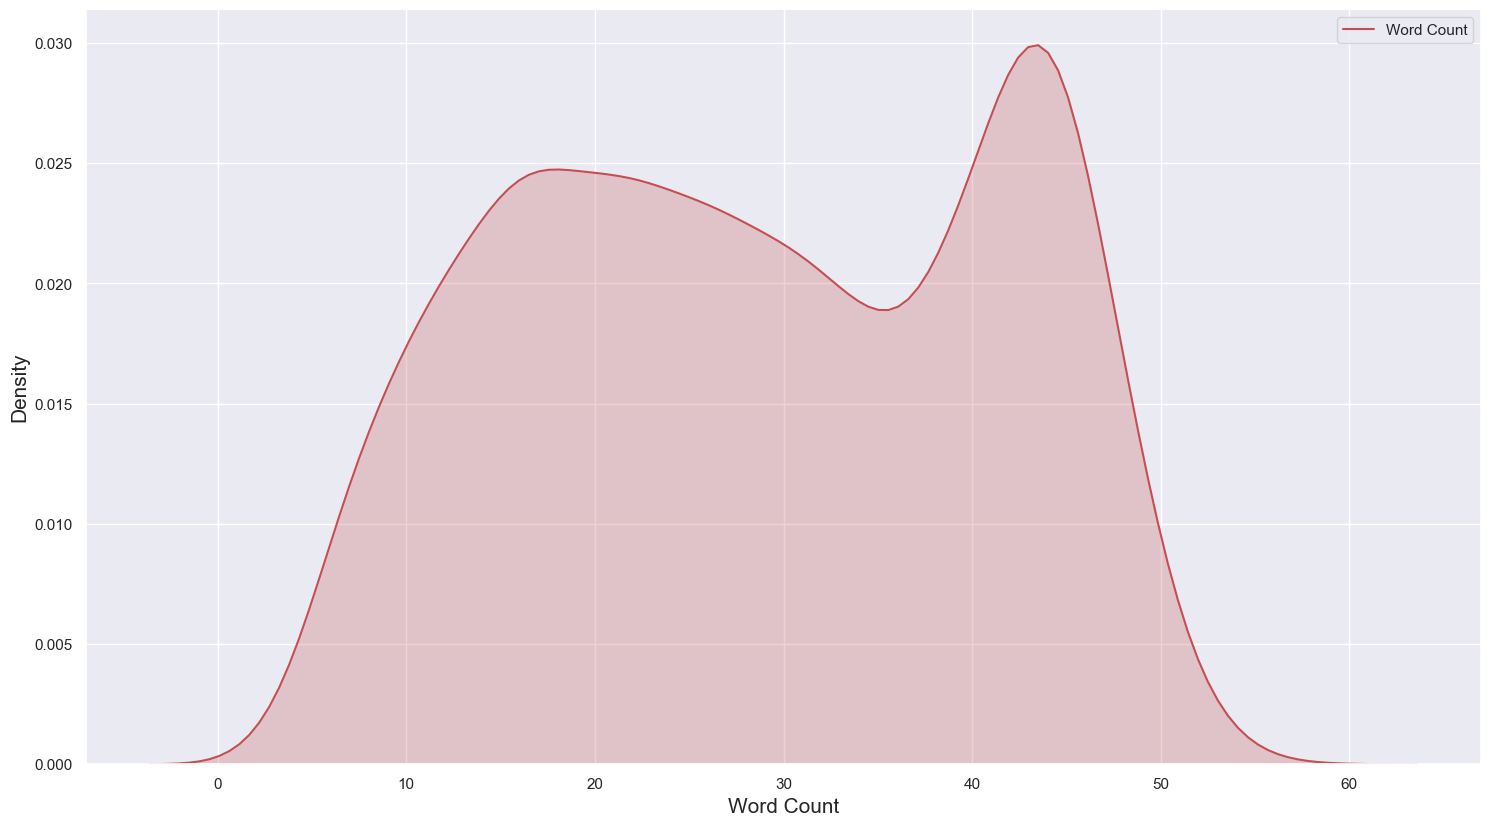

In [79]:
plt.figure(figsize=(18,10),dpi=100)
sns.kdeplot(data=data_new['Word Count'],color="r",shade=True)
plt.xlabel("Word Count",fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

#### Word Count across `Rating` and `Recommended IND`

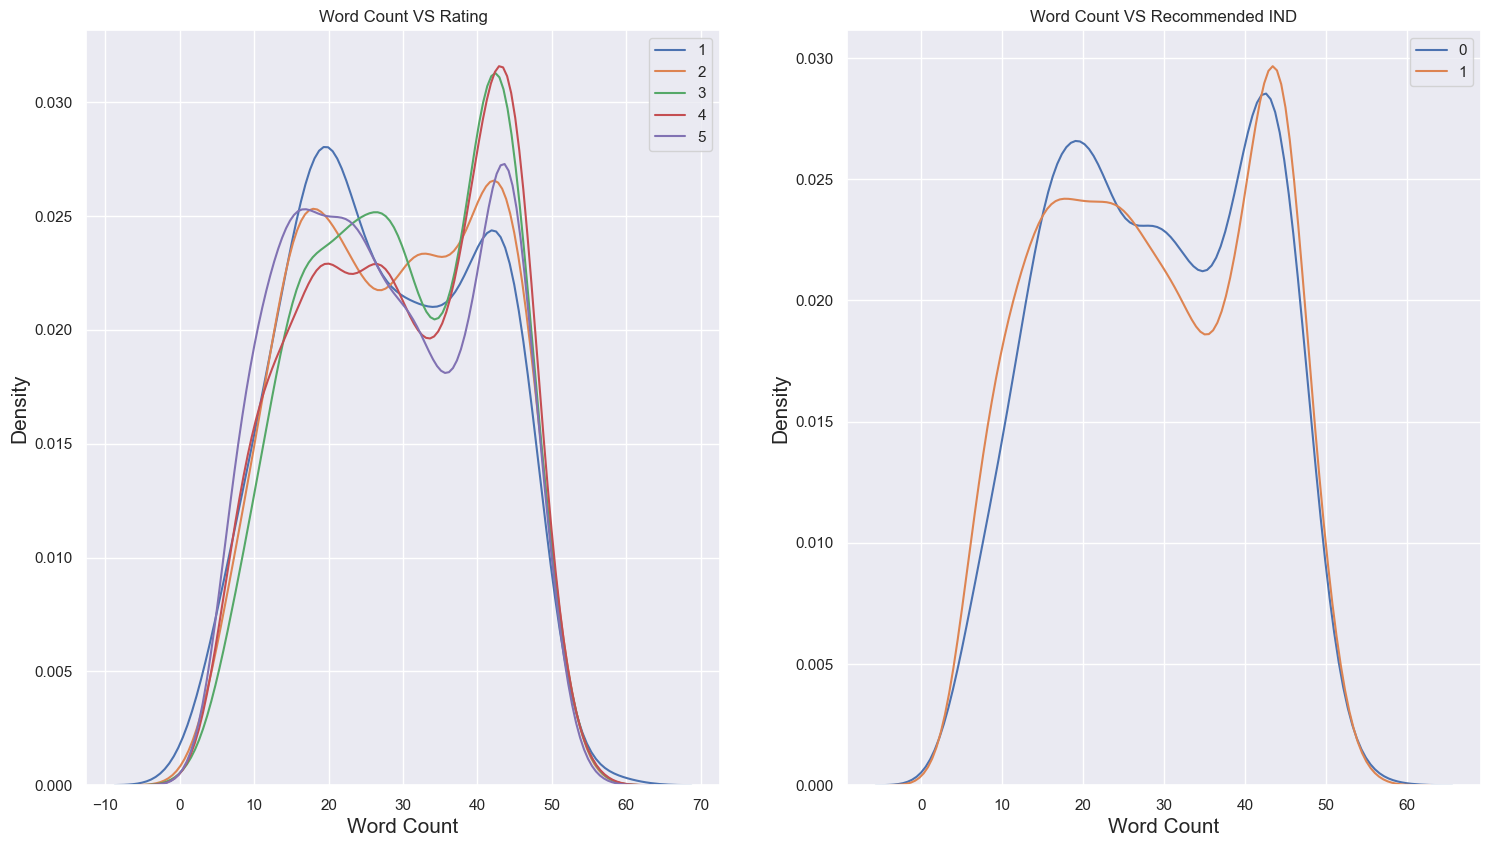

In [80]:
plt.figure(figsize=(18,10),dpi=100)
the_grid = gridspec.GridSpec(1, 2)

plt.subplot(the_grid[0],  title='Word Count VS Rating')
for i in range(1,6):
    sns.kdeplot(data=data_new[data_new['Rating']==i]['Word Count'],label=i)
plt.xlabel("Word Count",fontsize=15)
plt.ylabel("Density",fontsize=15)

#------------------------------------------------------------------------------------------------------------
plt.subplot(the_grid[1],  title='Word Count VS Recommended IND')
for i in range(2):
    sns.kdeplot(data=data_new[data_new['Recommended IND']==i]['Word Count'],label=i)
plt.xlabel("Word Count",fontsize=15)
plt.ylabel("Density",fontsize=15)

plt.show()

#### Most Frequent Words

##### Most Common words for Rating 5

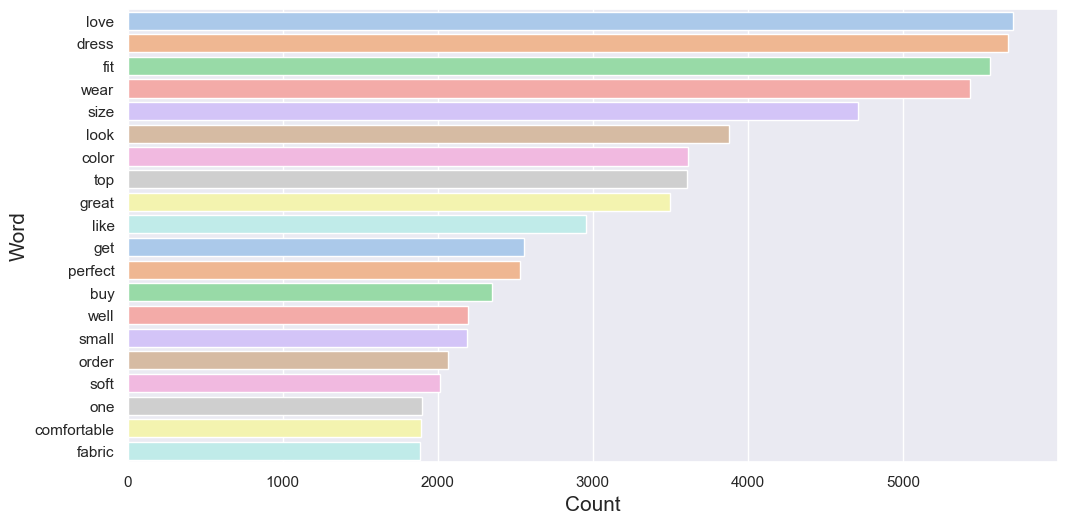

In [89]:
High_rated_Words = "  ".join(data_new[data_new['Rating']== 5]['Cleaned_Text'])
fd = FreqDist(High_rated_Words.split())
plt.figure(figsize=(12,6),dpi=100)
sns.barplot(data=pd.DataFrame(fd.most_common(20),columns=['Word','Count']),y="Word",x="Count",orient="h",palette=sns.color_palette('pastel'))
plt.xlabel("Count",fontsize=15)
plt.ylabel("Word",fontsize=15)
plt.show()

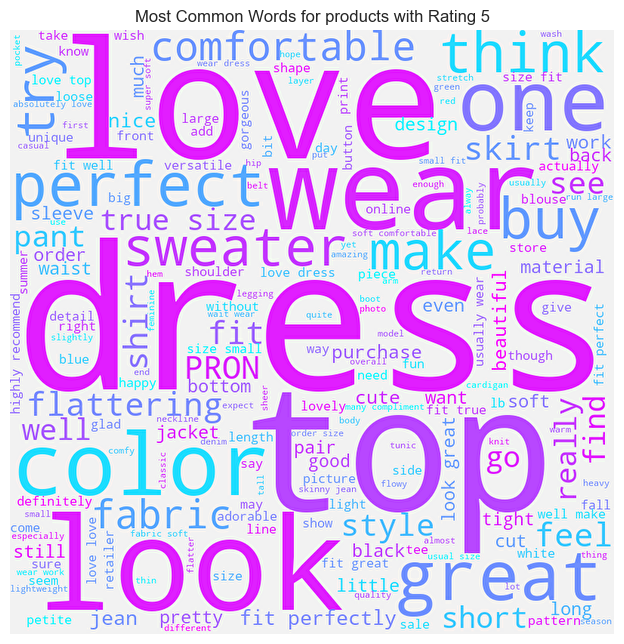

In [90]:
plt.figure(figsize=(10,8),dpi=100)
wc = WordCloud(width=800, height=800, margin=0, background_color="#f2f2f2" , 
                colormap=plt.get_cmap('cool') ,
                min_font_size = 10, max_font_size = 500).generate(' '.join(data_new[data_new['Rating'] == 5 ]['Cleaned_Text']))
plt.imshow(wc, interpolation='sinc')
plt.title("Most Common Words for products with Rating 5")
plt.axis("off")
plt.show()

##### Most Common words for Rating 1

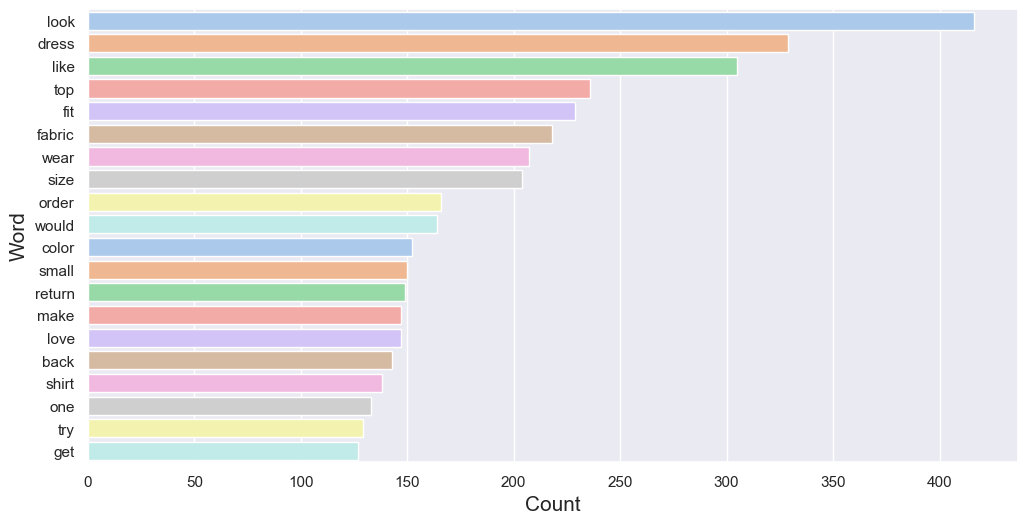

In [91]:
Low_rated_Words = "  ".join(data_new[data_new['Rating']== 1]['Cleaned_Text'])
fd = FreqDist(Low_rated_Words.split())
plt.figure(figsize=(12,6),dpi=100)
sns.barplot(data=pd.DataFrame(fd.most_common(20),columns=['Word','Count']),y="Word",x="Count",orient="h",palette=sns.color_palette('pastel'))
plt.xlabel("Count",fontsize=15)
plt.ylabel("Word",fontsize=15)
plt.show()

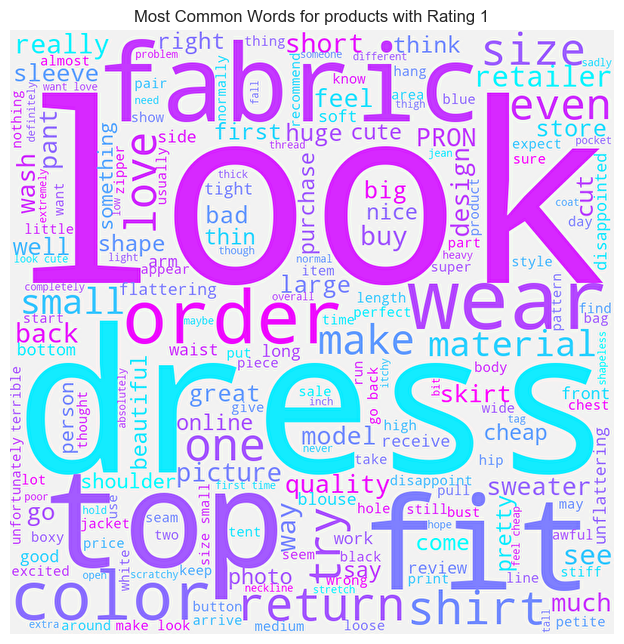

In [92]:
plt.figure(figsize=(10,8),dpi=100)
wc = WordCloud(width=800, height=800, margin=0, background_color="#f2f2f2" , 
                colormap=plt.get_cmap('cool') ,
                min_font_size = 10, max_font_size = 500).generate(' '.join(data_new[data_new['Rating'] == 1 ]['Cleaned_Text']))
plt.imshow(wc, interpolation='sinc')
plt.title("Most Common Words for products with Rating 1")
plt.axis("off")
plt.show()

#### Sentiment Analysis

In [95]:
SIA = SentimentIntensityAnalyzer()
data_new['Polarity_Score']=data_new["Review Text"].apply(lambda x:SIA.polarity_scores(x)['compound'])

In [96]:
data_new.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Cleaned_Text,Word Count,Polarity_Score
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hope dress really want work initially ord...,46,0.9427
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirty fabulous ev...,14,0.5727
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flattering due adjustable front tie perf...,16,0.9291
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,love tracy reese dress one petite foot tall us...,39,0.9419
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,ade basket hte last mintue see would look like...,47,0.8004
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,ordered carbon store pick ton stuff always try...,49,-0.0909
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,love dress usually get run little snug bust or...,16,0.7175
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,lbs order petite make sure length long typical...,31,-0.3724
10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses,dress run small esp zipper area run order typi...,31,0.3578
12,1095,53,Perfect!!!,More and more i find myself reliant on the rev...,5,1,2,General Petite,Dresses,Dresses,find reliant review write savvy shopper past r...,38,0.5520


In [98]:
# Assigning classes as per the Polarity Score
data_new.loc[data_new['Polarity_Score']>0,'Sentiment']="Positive" #Positive
data_new.loc[data_new['Polarity_Score']==0,'Sentiment']= "Neutral" #Neutral
data_new.loc[data_new['Polarity_Score']<0,'Sentiment']="Negative" #Negative

In [99]:
data_new.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Cleaned_Text,Word Count,Polarity_Score,Sentiment
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hope dress really want work initially ord...,46,0.9427,Positive
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirty fabulous ev...,14,0.5727,Positive
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flattering due adjustable front tie perf...,16,0.9291,Positive
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,love tracy reese dress one petite foot tall us...,39,0.9419,Positive
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,ade basket hte last mintue see would look like...,47,0.8004,Positive
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,ordered carbon store pick ton stuff always try...,49,-0.0909,Negative
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,love dress usually get run little snug bust or...,16,0.7175,Positive
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,lbs order petite make sure length long typical...,31,-0.3724,Negative
10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses,dress run small esp zipper area run order typi...,31,0.3578,Positive
12,1095,53,Perfect!!!,More and more i find myself reliant on the rev...,5,1,2,General Petite,Dresses,Dresses,find reliant review write savvy shopper past r...,38,0.5520,Positive


In [100]:
data_new.dtypes == object

Clothing ID                False
Age                        False
Title                       True
Review Text                 True
Rating                     False
Recommended IND            False
Positive Feedback Count    False
Division Name               True
Department Name             True
Class Name                  True
Cleaned_Text                True
Word Count                 False
Polarity_Score             False
Sentiment                   True
dtype: bool

### **Encoding Categorical Variables** <a name="Dummy_variables"></a>

In [112]:
df = data_new.drop(["Clothing ID", "Title", "Review Text", "Cleaned_Text", "Polarity_Score"], axis = 1) 

<font color = red> **The above features are not needed for our classification model as they irrelavant like `Clothing ID` and `Title` or been modified into other classes like `Cleaned_text` and `Polarity_Score`.**

In [113]:
list(df.columns) #Final Set of features selected for further analysis for the classification model. 

['Age',
 'Rating',
 'Recommended IND',
 'Positive Feedback Count',
 'Division Name',
 'Department Name',
 'Class Name',
 'Word Count',
 'Sentiment']

In [114]:
categorical_var = list(df.dtypes[df.dtypes == object].index)

# Create dummy variables using onehot encoding
dummy_cat_df = pd.get_dummies(df[categorical_var], drop_first=True) 

# Drops categorical variables from the df
df = df.drop(categorical_var, axis = 1) 

# Adds the newly created dummy variables instead
df = pd.concat([df, dummy_cat_df], axis = 1) 

In [115]:
df.columns

Index(['Age', 'Rating', 'Recommended IND', 'Positive Feedback Count',
       'Word Count', 'Division Name_General Petite', 'Division Name_Initmates',
       'Department Name_Dresses', 'Department Name_Intimate',
       'Department Name_Jackets', 'Department Name_Tops',
       'Department Name_Trend', 'Class Name_Casual bottoms',
       'Class Name_Chemises', 'Class Name_Dresses', 'Class Name_Fine gauge',
       'Class Name_Intimates', 'Class Name_Jackets', 'Class Name_Jeans',
       'Class Name_Knits', 'Class Name_Layering', 'Class Name_Legwear',
       'Class Name_Lounge', 'Class Name_Outerwear', 'Class Name_Pants',
       'Class Name_Shorts', 'Class Name_Skirts', 'Class Name_Sleep',
       'Class Name_Sweaters', 'Class Name_Swim', 'Class Name_Trend',
       'Sentiment_Neutral', 'Sentiment_Positive'],
      dtype='object')

In [117]:
rs = np.random.RandomState(0)
df_1 = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Rating,Recommended IND,Positive Feedback Count,Word Count,Division Name_General Petite,Division Name_Initmates,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend,Class Name_Casual bottoms,Class Name_Chemises,Class Name_Dresses,Class Name_Fine gauge,Class Name_Intimates,Class Name_Jackets,Class Name_Jeans,Class Name_Knits,Class Name_Layering,Class Name_Legwear,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend,Sentiment_Neutral,Sentiment_Positive
Age,1.000000,0.031424,0.035100,0.055867,0.027704,0.006327,-0.039678,-0.055554,-0.038839,0.011058,0.064121,0.006728,-0.010257,-0.003042,-0.055554,0.028397,-0.024564,0.009876,-0.003228,0.014056,-0.007844,-0.015434,-0.001118,0.004964,0.016579,-0.020102,-0.003670,0.004578,0.037516,-0.053072,0.006728,0.001739,0.000684
Rating,0.031424,1.000000,0.793128,-0.063855,-0.035858,0.007798,0.017884,-0.026430,0.017968,0.016358,-0.021346,-0.021280,-0.001207,-0.001207,-0.026430,0.014754,0.008128,0.019668,0.035604,-0.022230,0.010557,0.002635,0.016797,0.000011,0.022941,0.002768,0.012035,0.006353,-0.005487,-0.003502,-0.021280,-0.061375,0.332107
Recommended IND,0.035100,0.793128,1.000000,-0.067688,-0.010548,0.005301,0.018824,-0.024182,0.019308,0.012503,-0.022009,-0.011464,0.003384,0.003384,-0.024182,0.010278,0.009729,0.014664,0.036116,-0.015273,0.012831,0.006005,0.017236,0.000543,0.014709,0.003245,0.016105,0.007499,-0.015798,-0.007145,-0.011464,-0.051912,0.312943
Positive Feedback Count,0.055867,-0.063855,-0.067688,1.000000,0.202937,0.008976,-0.025071,0.027226,-0.023372,0.008262,-0.010255,0.015024,-0.004368,-0.004368,0.027226,-0.020502,-0.030994,0.011925,-0.028052,-0.020550,-0.019670,-0.014317,-0.000955,-0.002880,0.005762,-0.012304,0.012272,-0.012143,-0.009225,0.003292,0.015024,-0.009255,-0.018220
Word Count,0.027704,-0.035858,-0.010548,0.202937,1.000000,0.001436,-0.039767,0.081536,-0.041878,0.037589,-0.076843,0.023625,-0.006038,-0.010006,0.081536,-0.024242,-0.023952,0.011523,-0.006036,-0.087513,-0.024346,-0.027612,-0.020957,0.048821,0.015144,-0.008384,0.010298,-0.035372,-0.002080,0.017261,0.023625,-0.096353,0.045545
Division Name_General Petite,0.006327,0.007798,0.005301,0.008976,0.001436,1.000000,-0.187459,0.085399,-0.124548,0.014889,-0.006137,-0.026588,-0.005226,-0.005226,0.085399,0.014378,-0.057428,0.037262,-0.011728,-0.026491,-0.055469,-0.060020,-0.006226,-0.028047,0.027554,-0.084678,0.010407,-0.069049,0.012406,-0.089832,-0.026588,0.001831,0.003704
Division Name_Initmates,-0.039678,0.017884,0.018824,-0.025071,-0.039767,-0.187459,1.000000,-0.157451,0.926700,-0.055907,-0.230778,-0.019065,-0.001864,0.027879,-0.157451,-0.057589,0.306350,-0.045796,-0.059233,-0.130210,0.295901,0.320176,0.436473,-0.031084,-0.065054,-0.030209,-0.053514,0.368344,-0.066551,0.479209,-0.019065,0.010887,-0.011253
Department Name_Dresses,-0.055554,-0.026430,-0.024182,0.027226,0.081536,0.085399,-0.157451,1.000000,-0.169905,-0.131622,-0.543325,-0.044886,-0.004390,-0.004390,1.000000,-0.135583,-0.048235,-0.107819,-0.139453,-0.306556,-0.046590,-0.050412,-0.105614,-0.073182,-0.153158,-0.071122,-0.125989,-0.057996,-0.156683,-0.075452,-0.044886,-0.011844,-0.002362
Department Name_Intimate,-0.038839,0.017968,0.019308,-0.023372,-0.041878,-0.124548,0.926700,-0.169905,1.000000,-0.060329,-0.249032,-0.020573,-0.002012,0.025836,-0.169905,-0.062144,0.283895,-0.049419,-0.063918,-0.140509,0.274211,0.296707,0.621604,-0.033543,-0.070200,-0.032599,-0.057747,0.341344,-0.071815,0.444083,-0.020573,0.018622,-0.013345
Department Name_Jackets,0.011058,0.016358,0.012503,0.008262,0.037589,0.014889,-0.055907,-0.131622,-0.060329,1.000000,-0.192920,-0.015938,-0.001559,-0.001559,-0.131622,-0.048142,-0.017127,0.819159,-0.049516,-0.108850,-0.016543,-0.017900,-0.037501,0.556000,-0.054383,-0.025254,-0.044735,-0.020593,-0.055634,-0.026791,-0.015938,0.005191,0.000267


<font color = red> **From the above correlation table we can see that [`Class Name_Jackets` and `Department Name_Jackets`] are highly correlated. We can remove one of them. Similarly for [`Division Name_Initmates` and `Department Name_Intimate`], [`Class Name_Dresses` and `Department Name_Dresses`] and [`Department Name_Trend` and `Class Name_Trend`].**

In [118]:
df_final = df.drop(["Class Name_Jackets", "Division Name_Initmates", "Class Name_Dresses", "Department Name_Trend"], axis = 1)

In [119]:
df_final

,Age,Rating,Recommended IND,Positive Feedback Count,Word Count,Division Name_General Petite,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,...,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend,Sentiment_Neutral,Sentiment_Positive
2,60,3,0,0,46,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,50,5,1,0,14,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,47,5,1,6,16,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,49,2,0,4,39,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,39,5,1,1,47,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23479,42,5,1,0,45,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
23481,34,5,1,0,11,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23482,48,3,1,0,23,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
23483,31,3,0,1,17,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### **Balancing Dataset** <a name="Balancing"></a>

In [120]:
df_final["Recommended IND"].value_counts()

1    15765
0     3474
Name: Recommended IND, dtype: int64

Text(0, 0.5, 'Count')

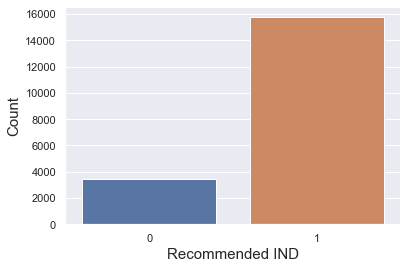

In [121]:
sns.countplot(df_final["Recommended IND"])
plt.xlabel("Recommended IND", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

<font color = red> **There is a class imbalance in our target variable. If we run the our classification model, it will be biased towards the classifying the products as Recommeneded (1). To overcome this we can use `SMOTE`.**

In [122]:
os = SMOTE(random_state=0) # using the smote technique 
# (somehow oversampling) to balance the data

input_var = list(set(df_final.columns) - set(['Recommended IND'])) # sets the input var

X, Y = os.fit_sample(df_final[df_final.columns.difference(['Recommended IND'])], df_final['Recommended IND']) # oversamples the data
X = pd.DataFrame(X, columns = input_var) # makes the X array as a dataframe
Y = pd.DataFrame(Y, columns = ['Recommended IND']) # makes the Y array as a dataframe

df_final = pd.concat([X, Y], axis=1) # Combine X and Y

In [123]:
df_final["Recommended IND"].value_counts()

1    15765
0    15765
Name: Recommended IND, dtype: int64

Text(0, 0.5, 'Count')

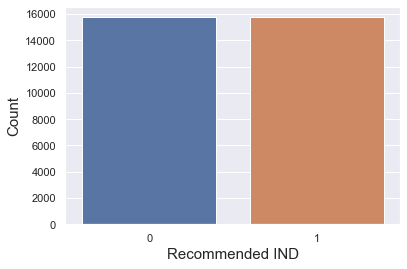

In [124]:
sns.countplot(df_final["Recommended IND"])
plt.xlabel("Recommended IND", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

## Classification Models  <a name="Models"></a>

In [125]:
#from sklearn.model_selection import train_test_split
input_vari = list(set(df_final.columns)- set(["Recommended IND"]))
X = df_final[input_vari]
Y = df_final["Recommended IND"]

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

### Decision Tree Classifier

In [127]:
dt = DecisionTreeClassifier(criterion = "gini", splitter = "best", max_depth = 5) 
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [162]:
dt_pred_y_train = dt.predict(X_train)

In [163]:
print("Accuracy, Precision, recall, and F1 were:")
print(accuracy_score(Y_train, pred_y_train))
print(precision_score(Y_train, pred_y_train))
print(recall_score(Y_train, pred_y_train))
print(f1_score(Y_train, pred_y_train))  
print("")

Accuracy, Precision, recall, and F1 were:
0.9587694259435459
0.9832935560859188
0.9333937471681015
0.9576940957694097



In [164]:
tn, fp, fn, tp = confusion_matrix(Y_train,pred_y_train).ravel()

In [165]:
tn, fp, fn, tp 

(10861, 175, 735, 10300)

In [166]:
dt_pred_y_test = dt.predict(X_test)

In [167]:
print("Accuracy, Precision, recall, and F1 were:")
print(accuracy_score(Y_test, pred_y_test))
print(precision_score(Y_test, pred_y_test))
print(recall_score(Y_test, pred_y_test))
print(f1_score(Y_test, pred_y_test))  
print("")

Accuracy, Precision, recall, and F1 were:
0.9550692462205307
0.9825151311365165
0.9266384778012685
0.9537591121749538



In [168]:
tn, fp, fn, tp = confusion_matrix(Y_test,dt_pred_y_test).ravel()

In [169]:
tn, fp, fn, tp 

(4651, 78, 347, 4383)

### Naive Bayes Classifier

In [142]:
naive = GaussianNB()
naive.fit(X_train, Y_train)

GaussianNB()

In [143]:
naive_pred = naive.predict(X_train)

In [144]:
print("Accuracy, Precision, recall, and F1 were:")
print(accuracy_score(Y_train, naive_pred))
print(precision_score(Y_train, naive_pred))
print(recall_score(Y_train, naive_pred))
print(f1_score(Y_train, naive_pred))  
print("")

Accuracy, Precision, recall, and F1 were:
0.6642200172171628
0.8637093536732237
0.38994109651110104
0.5373041143784729



In [145]:
naive_pred_test = naive.predict(X_test)

In [146]:
print("Accuracy, Precision, recall, and F1 were:")
print(accuracy_score(Y_test, naive_pred_test))
print(precision_score(Y_test, naive_pred_test))
print(recall_score(Y_test, naive_pred_test))
print(f1_score(Y_test, naive_pred_test))  
print("")

Accuracy, Precision, recall, and F1 were:
0.6565176022835395
0.8678589170392449
0.3693446088794926
0.5181669879875427



### Logistic Regression 

In [149]:
lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train, Y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [150]:
pred_Y_lr = lr.predict(X_train)

In [151]:
print("Accuracy, Precision, recall, and F1 were:")
print(accuracy_score(Y_train, pred_Y_lr))
print(precision_score(Y_train, pred_Y_lr))
print(recall_score(Y_train, pred_Y_lr))
print(f1_score(Y_train, pred_Y_lr))  
print("")

Accuracy, Precision, recall, and F1 were:
0.9585428843278511
0.9812630778010272
0.9349342999546896
0.9575386328831964



In [152]:
pred_Y_lr_test = lr.predict(X_test)

In [153]:
print("Accuracy, Precision, recall, and F1 were:")
print(accuracy_score(Y_test, pred_Y_lr_test))
print(precision_score(Y_test, pred_Y_lr_test))
print(recall_score(Y_test, pred_Y_lr_test))
print(f1_score(Y_test, pred_Y_lr_test))  
print("")

Accuracy, Precision, recall, and F1 were:
0.9559150015857913
0.9816841635023453
0.9291754756871036
0.9547083740632129



###  SVM Classifier

In [155]:
SVM_clf = svm.SVC()
SVM_clf.fit(X_train, Y_train)

SVC()

In [156]:
pred_Y_svm = SVM_clf.predict(X_train)

In [157]:
print("Accuracy, Precision, recall, and F1 were:")
print(accuracy_score(Y_train, pred_Y_svm))
print(precision_score(Y_train, pred_Y_svm))
print(recall_score(Y_train, pred_Y_svm))
print(f1_score(Y_train, pred_Y_svm))  
print("")

Accuracy, Precision, recall, and F1 were:
0.9586335009741289
0.9825514874141876
0.9338468509288627
0.9575802629744924



In [158]:
pred_Y_svm_test = SVM_clf.predict(X_test)

In [159]:
print("Accuracy, Precision, recall, and F1 were:")
print(accuracy_score(Y_test, pred_Y_svm_test))
print(precision_score(Y_test, pred_Y_svm_test))
print(recall_score(Y_test, pred_Y_svm_test))
print(f1_score(Y_test, pred_Y_svm_test))  
print("")

Accuracy, Precision, recall, and F1 were:
0.9558092821651337
0.9827586206896551
0.9279069767441861
0.9545454545454546



## Performance Comparison & Model Selection <a name="Selection"></a>

In [161]:
def detailed_stats(Y_test,y_pred):
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    fpr = fp/(fp+tn)
    precision = tp / (tp + fp)
    Recall = tp/(fn+tp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = (tp+tn)/(tp+fp+tn+fn)
    fmeasure = (2*precision*Recall) /(precision+Recall)
    return [accuracy,precision,Recall,fmeasure,sensitivity,specificity]

In [187]:
y_pred = [dt_pred_y_test, naive_pred_test,pred_Y_lr_test, pred_Y_svm_test]
index = ['Decision Tree','Naive Bayes', 'Logistic Regression', 'SVM']
performance = pd.DataFrame(columns = [ 'Accuracy', 'Precision', 'Recall','FMeasure','Sensitivity','Specificity'])
for i, pred in enumerate(y_pred):
    performance.loc[index[i]] = detailed_stats(Y_test, pred)
performance

,Accuracy,Precision,Recall,FMeasure,Sensitivity,Specificity
Decision Tree,0.955069,0.982515,0.926638,0.953759,0.926638,0.983506
Naive Bayes,0.656518,0.867859,0.369345,0.518167,0.369345,0.943751
Logistic Regression,0.955915,0.981684,0.929175,0.954708,0.929175,0.982660
SVM,0.955809,0.982759,0.927907,0.954545,0.927907,0.983717


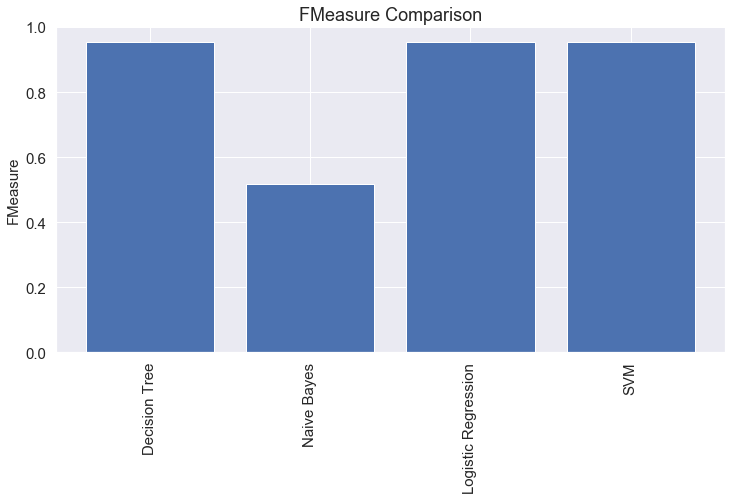

In [189]:
labels = list(performance.index)
bar_fig = plt.figure(figsize = (12, 6))
    
_  = plt.bar(
    x = range(1, len(performance) + 1),
    height = list(performance["FMeasure"]),
    tick_label = labels
)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("FMeasure Comparison", fontsize = 18)

## Set the y-label
_ = plt.ylabel("FMeasure", fontsize = 15)

## rotate the x-tick labels
_ = plt.xticks(rotation = 90)

<font color = red> **From the above table, expect Naive Bayes all other Classifier models perform well in `Accuracy` and `FMeasure` as well as other metrics.**